In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [13]:
df = pd.read_csv("F:\data analytics\python\sales_analysis\sales_data.csv",encoding="unicode_escape")

In [15]:
df.shape

(11251, 15)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [16]:
df.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


## Data cleaning

In [17]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [18]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [20]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [21]:
# delete null value
df.dropna(inplace=True)

In [22]:
df.shape

(11239, 13)

In [23]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [26]:
# change data type of amount from float to integer
df['Amount']=df['Amount'].astype('int')

## Explotary Data analysis

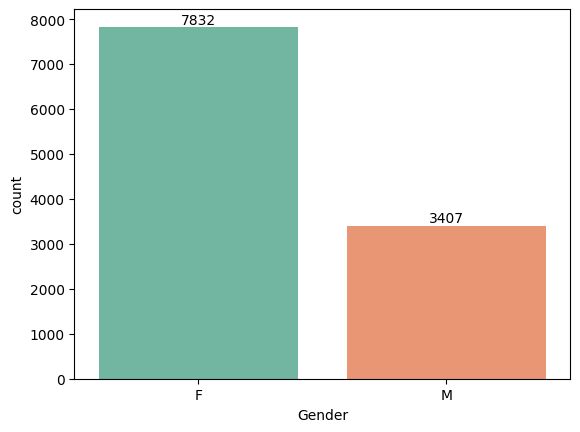

In [ ]:
ax = sns.countplot(x = 'Gender',data = df, palette='Set2', hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

In [48]:
df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

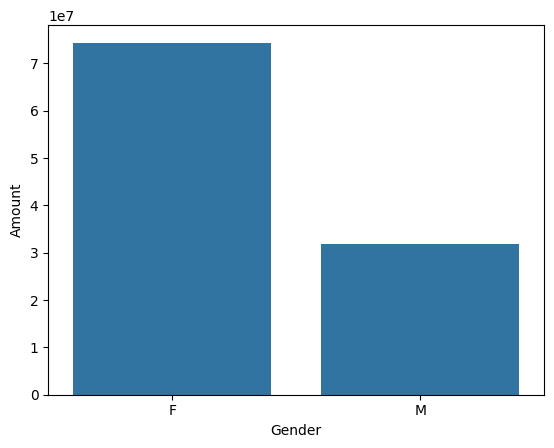

In [47]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x='Gender', y='Amount', data=sales_gen)

### From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

### Age

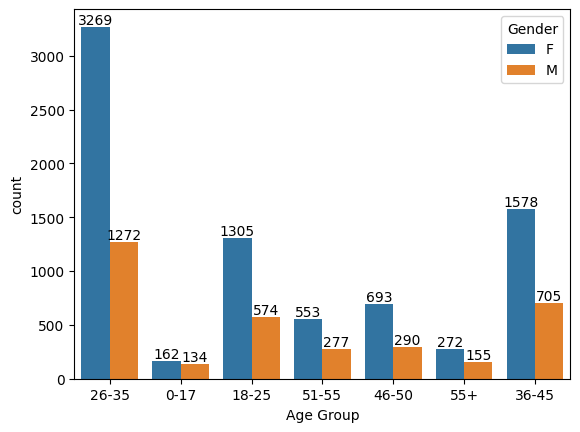

In [68]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

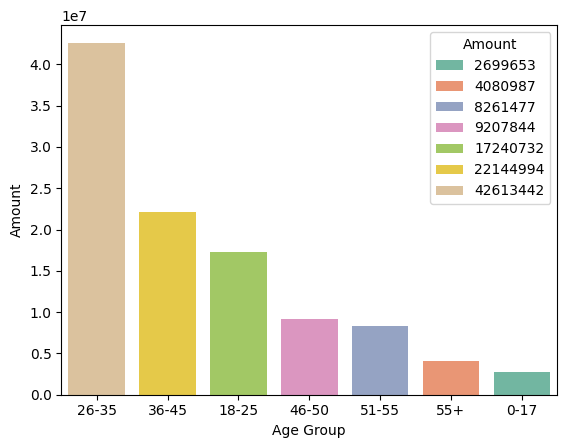

In [76]:
# Total amount vs age_group
sale_age = df.groupby(['Age Group'],as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(x = 'Age Group', y = 'Amount', data = sale_age, palette = 'Set2', hue = 'Amount')

*From the above graph we can see that most of the buyers are from age group 26-35*

*State*

In [78]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

C:\Users\hp\AppData\Local\Temp\ipykernel_20436\1182060093.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_state, x = 'State',y= 'Orders', palette = 'Set2')


<Axes: xlabel='State', ylabel='Orders'>

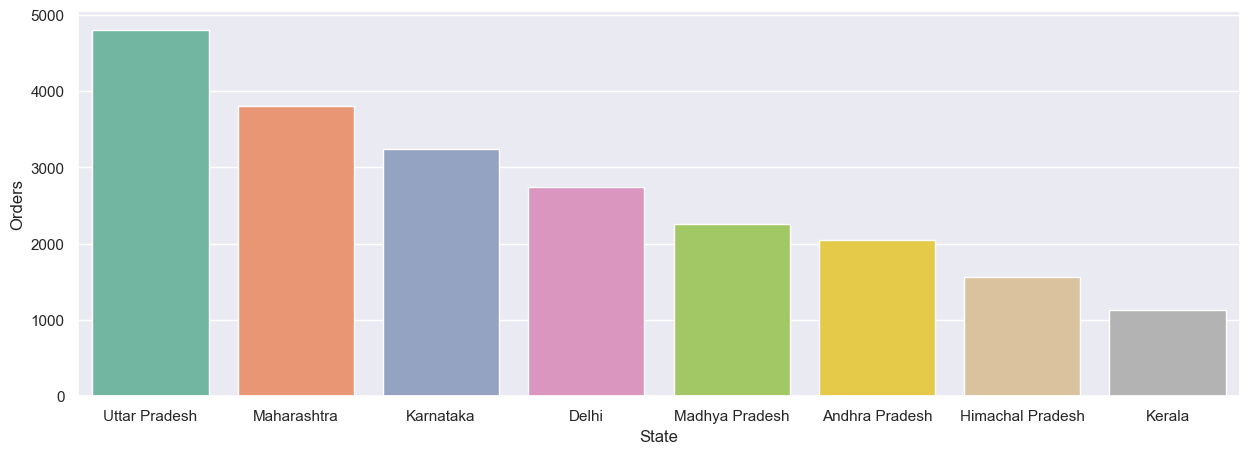

In [92]:
# Total amount of orders fron states
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(8)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders', palette = 'Set2')

### The above graph shows maximum order is received from Utter Pradesh

C:\Users\hp\AppData\Local\Temp\ipykernel_20436\939010956.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_state, x = 'State',y= 'Amount', palette = 'Set2')


<Axes: xlabel='State', ylabel='Amount'>

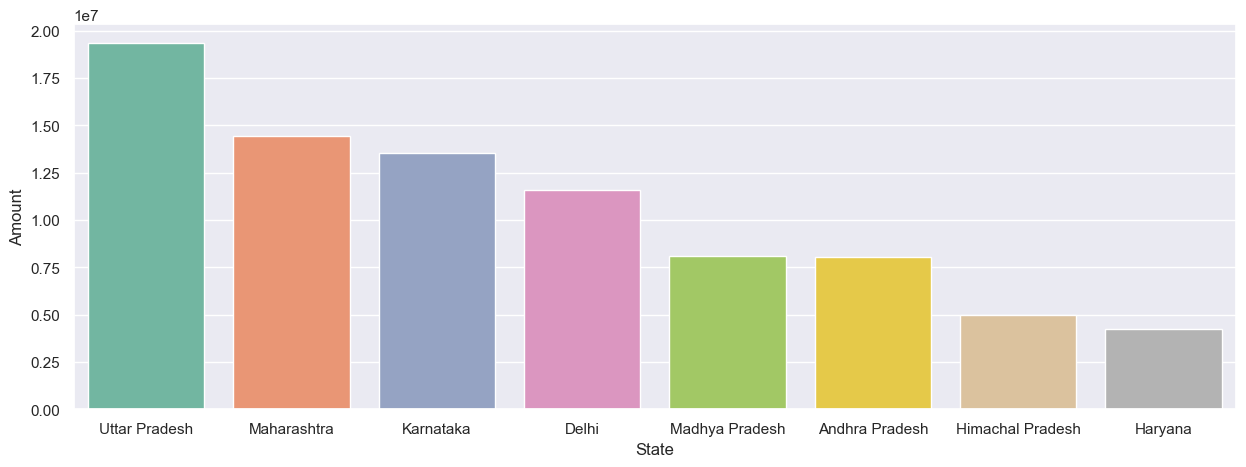

In [94]:
# Total sales/ order from top 8 states
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(8)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount', palette = 'Set2')

### Top 8 States according to order revenue 

## Marital Status

In [97]:
df['Marital_Status'] = df['Marital_Status'].map({0: 'Unmarried', 1: 'Married'})

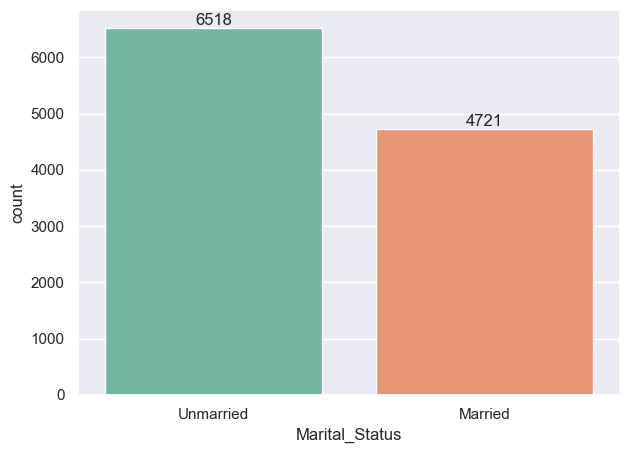

In [100]:
ax = sns.countplot(data = df, x = 'Marital_Status', palette = 'Set2', hue = 'Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

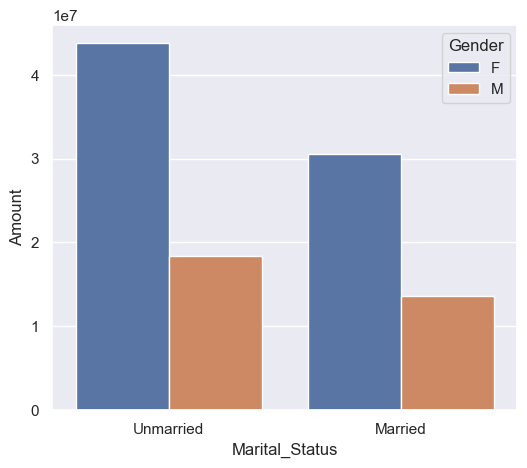

In [101]:
# Marital_status Gender vise
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

### Occupation

<Axes: xlabel='Occupation', ylabel='Amount'>

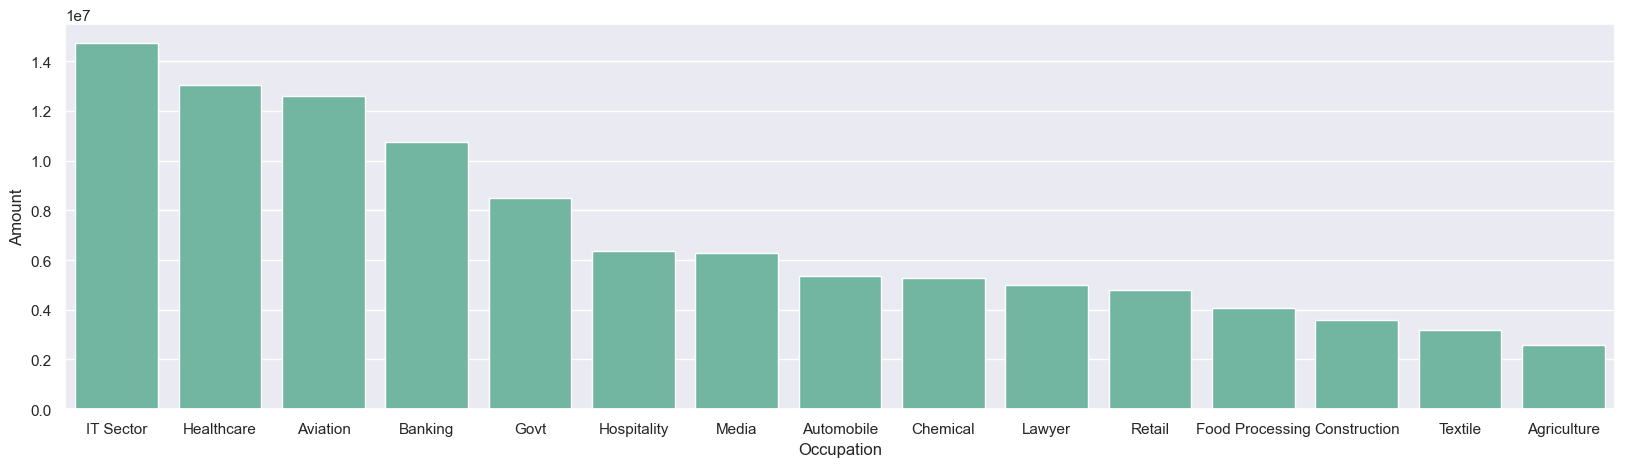

In [103]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)},palette = 'Set2')
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')

*From above graph we can see that most of the buyers are from IT sector, healthcare and Avetion*

## Product Category

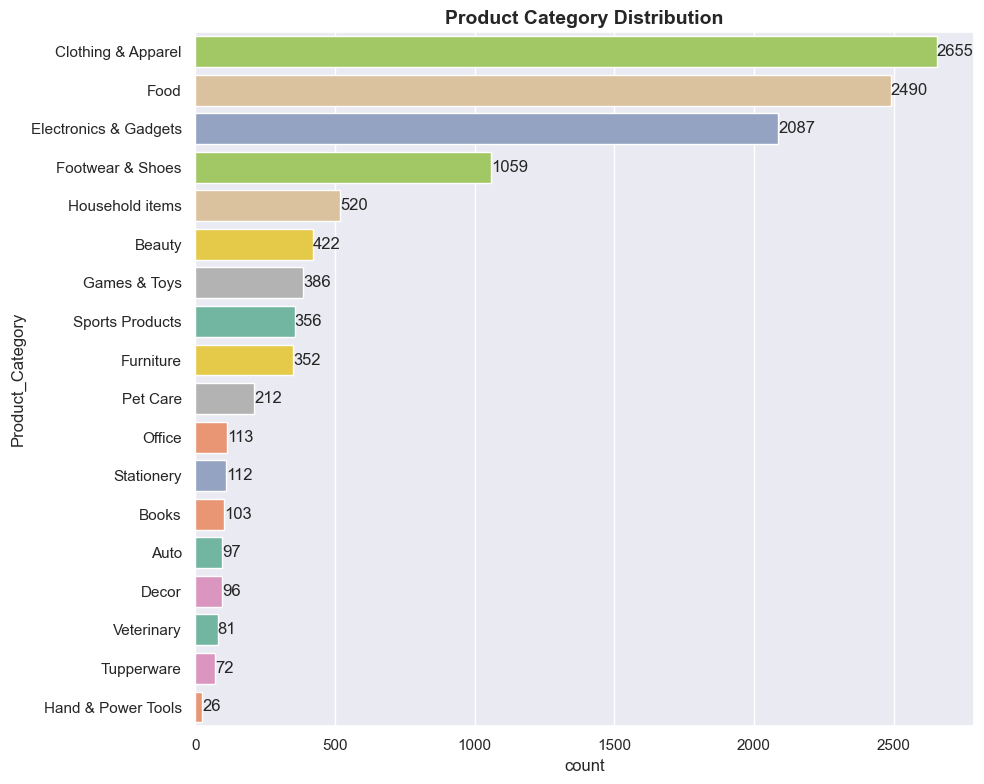

In [105]:
sns.set(rc={'figure.figsize':(10,8)})

order = df['Product_Category'].value_counts().index

ax = sns.countplot(
    data=df,
    y='Product_Category',
    order=order,
    hue='Product_Category',
    palette='Set2',
    legend=False
)

for bars in ax.containers:
    ax.bar_label(bars)

plt.title("Product Category Distribution", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


*Major order are comming for Clothing ,Food and Electronics*

C:\Users\hp\AppData\Local\Temp\ipykernel_20436\3605735929.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount', palette = 'Set2')


<Axes: xlabel='Product_Category', ylabel='Amount'>

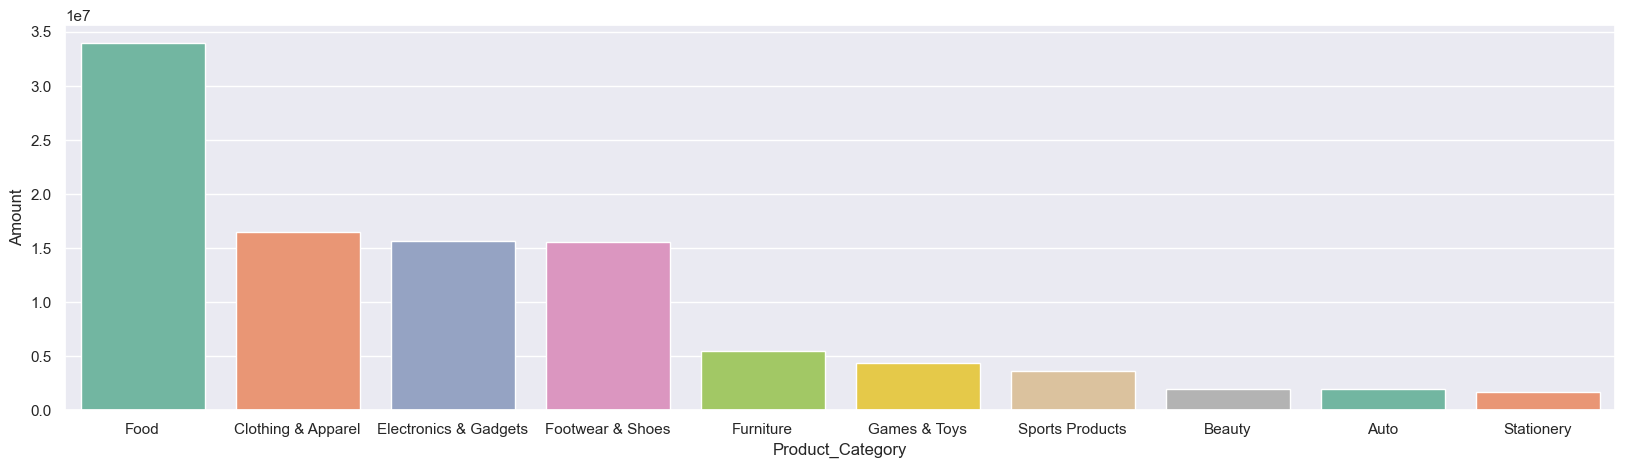

In [107]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount', palette = 'Set2')

*High revenue is generated from Food Products*

<Axes: xlabel='Product_ID'>

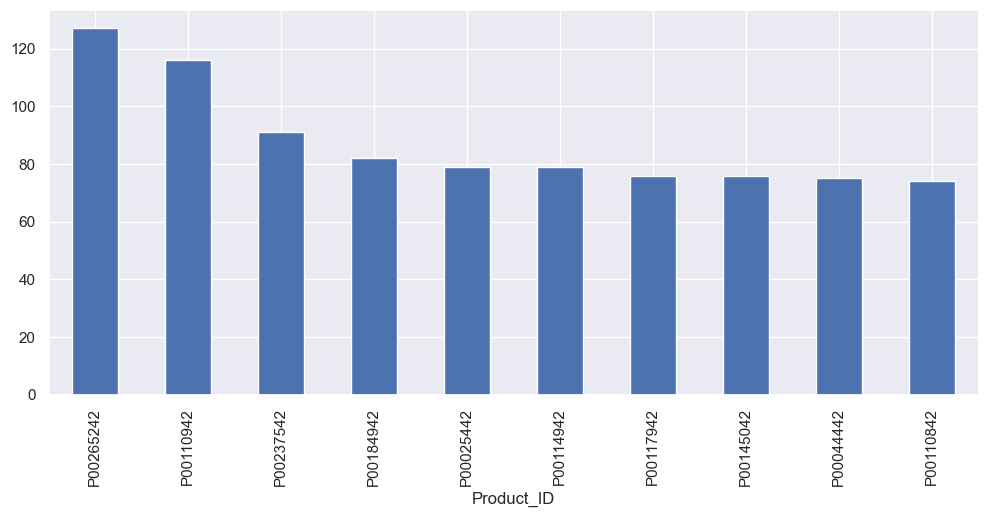

In [109]:

fig1, ax1 = plt.subplots(figsize=(12,5))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

*The above graph shows highest sold product code*

## Conclusion:

*Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*